# reading HDF5 data file and understanding the dataset structure

In [1]:
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
path = '/home/suraj/Data/Duke_WLOA_RL_Annotated/Duke_WLOA_Control.h5'

In [3]:
f = h5py.File(path, 'r')
f.keys()

<KeysViewHDF5 ['images', 'layer_maps', 'layer_names', 'patient_indices', 'splits']>

In [4]:
images = f['images']
layers = f['layer_maps']
images, layers

(<HDF5 dataset "images": shape (5088, 512, 1000), type "<f4">,
 <HDF5 dataset "layer_maps": shape (5088, 1000, 3), type "<f4">)

In [5]:
print(type(images))

<class 'h5py._hl.dataset.Dataset'>


In [7]:
image = images[1, :, :,]
print(image)

[[0.7764706  0.7921569  0.8        ... 0.61960787 0.57254905 0.6313726 ]
 [0.7058824  0.69411767 0.7058824  ... 0.4392157  0.42745098 0.4745098 ]
 [0.5647059  0.5647059  0.5568628  ... 0.29803923 0.07843138 0.3137255 ]
 ...
 [0.12941177 0.23529412 0.23137255 ... 0.29411766 0.         0.16470589]
 [0.10196079 0.3019608  0.3372549  ... 0.29803923 0.         0.19215687]
 [0.05882353 0.19215687 0.         ... 0.08627451 0.         0.11764706]]


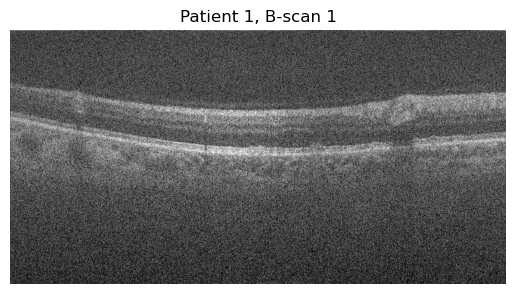

In [ ]:
plt.imshow(image, cmap='gray')
plt.title('Patient 1, B-scan 1')
plt.axis('off')
plt.show()

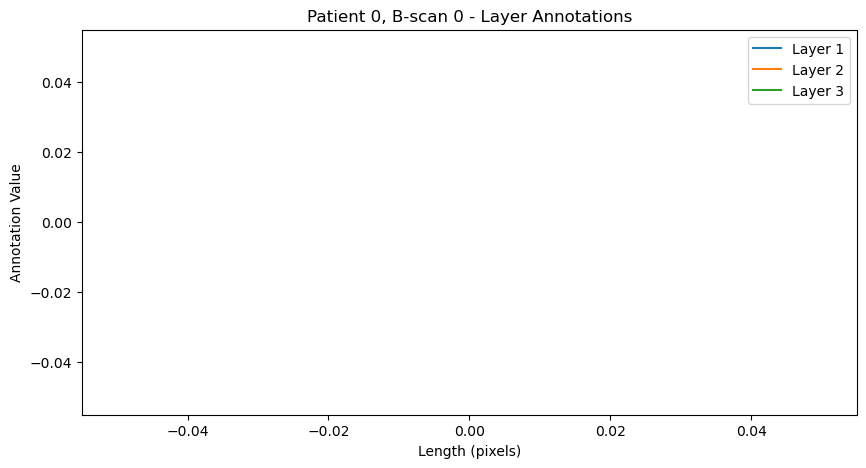

In [12]:
patient_idx = 0      # Change as needed
bscan_idx = 0        # Change as needed

layer_map = layers[patient_idx, bscan_idx, :, :]  # shape: (1000, 3)

plt.figure(figsize=(10, 5))
for i in range(3):
    plt.plot(layer_map[:, i], label=f'Layer {i+1}')
plt.title(f'Patient {patient_idx}, B-scan {bscan_idx} - Layer Annotations')
plt.xlabel('Length (pixels)')
plt.ylabel('Annotation Value')
plt.legend()
plt.show()

In [13]:
print("Min:", np.nanmin(layer_map), "Max:", np.nanmax(layer_map))
print("Unique values:", np.unique(layer_map))
print("Any NaNs?", np.isnan(layer_map).any())
print("Shape:", layer_map.shape)

Min: nan Max: nan
Unique values: [nan]
Any NaNs? True
Shape: (1000, 3)


/tmp/ipykernel_79125/2447828619.py:1: RuntimeWarning: All-NaN slice encountered
  print("Min:", np.nanmin(layer_map), "Max:", np.nanmax(layer_map))


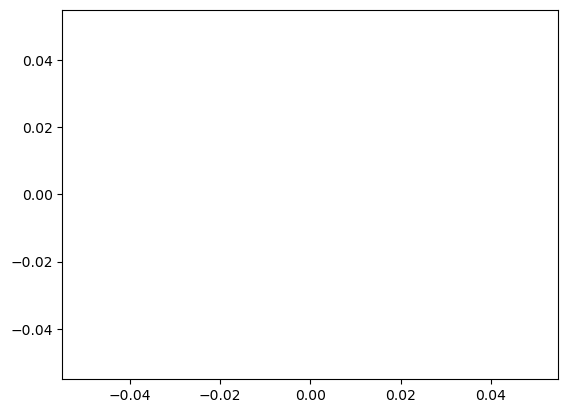

In [14]:
for i in range(3):
    plt.plot(layer_map[:, i], marker='.')
plt.show()